# Project Name: Wine Type Predictor

### Goal: To predict type of wine (red/white) based on various factors.

**Dataset 1**: Kaggle Red Wine Quality Dataset ( https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009 )<br>
**Dataset 2**: Kaggle White Wine Quality Dataset ( https://www.kaggle.com/datasets/piyushagni5/white-wine-quality )

**About the Project**: Wine is one of the most consumed beverages across all regions of the world, making its production a top priority for several companies globally. Understanding the type of wine—whether red or white—is crucial for various aspects of wine production, marketing, and sales.<br>
Typically, distinguishing between red and white wine involves manual inspection and chemical analysis, which can be time-consuming and costly. However, if we can accurately predict the type of wine using readily available data, we can streamline the production process and reduce costs.

To facilitate this, we develop a Machine Learning model that will be trained with relevant data on various properties of wine. This model will help us accurately determine the type of wine when provided with adequate information as input, thus saving resources and improving operational efficiency.

### Section 1: Collecting the data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
red_data = pd.read_csv(r"C:\Users\goura\Desktop\Data Science\Datasets\Red Wine Quality.csv")

In [3]:
white_data = pd.read_csv(r"C:\Users\goura\Desktop\Data Science\Datasets\White Wine Quality.csv", sep =';')

In [4]:
white_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [5]:
red_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Section 2: Data Cleaning/Manipulation

The first step in Data Cleaning/Manipulation is to deal with Null(NaN) values.<br>
There are two methods to do it-
* Imputation [ filling in NaN values with a substitute derived of available data ]
* Dropping data [ removing all rows with NaN entirely ]

Both strategies are useful in different situations, those being
* When %age of NaN values is low, dropping is good because-
    * minute loss of data wont have significant affect on quality of predictions
    * substitute values would not introduce much information due to abundance of data
* When %age of NaN values is high, Imputing them is a better choice because-
    * Dropping NaN rows will cause loss of a decent chunk of data, which will affect prediction quality
    * substitute values will hold more significance 

Since this dataset doesn't contain many NaN values, lets go by dropping the NaN rows.

In [6]:
red_data.dropna(axis=1, inplace = True)
red_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
red_data.dropna(axis=1, inplace = True)
red_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
columns = [ i for i in red_data.columns ]
features = columns[:-1]
label = columns[-1]

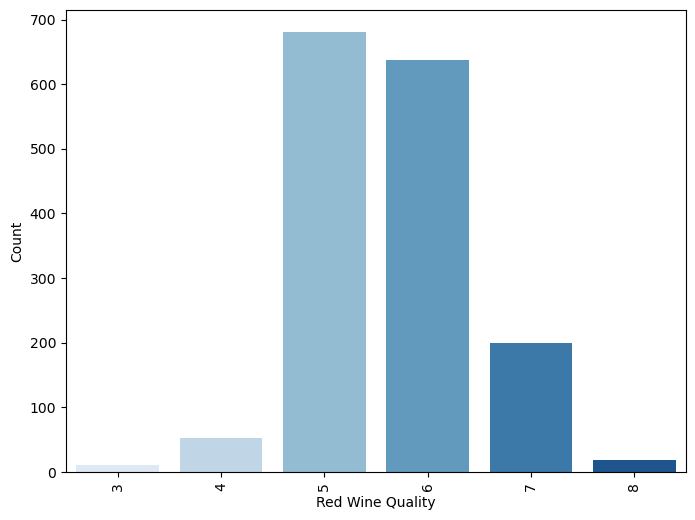

In [9]:
counts = red_data[label].value_counts()
temp_df = pd.DataFrame({
    "Red Wine Quality":counts.index,
    "Count":counts.values})
palette = sns.color_palette("Blues",len(temp_df))
plt.figure(figsize=(8,6))
sns.barplot(x="Red Wine Quality",y="Count",data=temp_df, palette=palette)
plt.xticks(rotation=90)
plt.show()

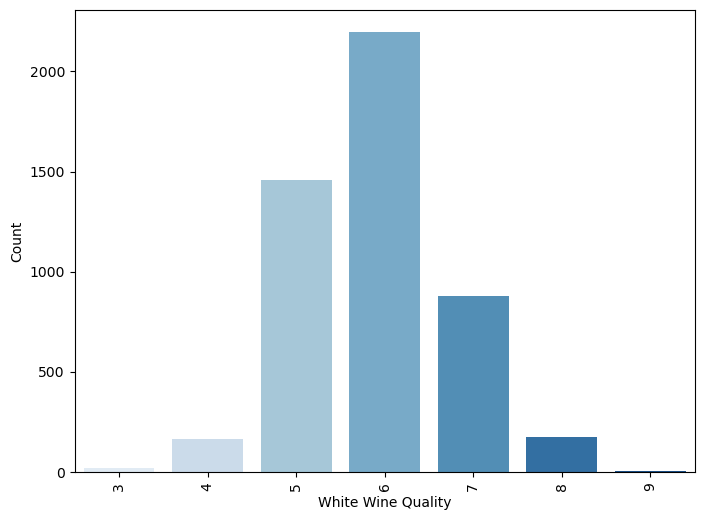

In [10]:
counts = white_data[label].value_counts()
temp_df = pd.DataFrame({
    "White Wine Quality":counts.index,
    "Count":counts.values})
palette = sns.color_palette("Blues",len(temp_df))
plt.figure(figsize=(8,6))
sns.barplot(x="White Wine Quality",y="Count",data=temp_df, palette=palette)
plt.xticks(rotation=90)
plt.show()

Its quite apparent that there is a imbalance in no of samples for each quality of wine.<br>
It is also noticable that White Wine tends to have a higher quality distribution than Red Wine<br>

Lets proceed with our data.

In [11]:
red_data["type"]=1
white_data["type"]=0
wines = pd.concat([red_data, white_data], ignore_index=True)
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


We will need to split this data into 4 parts, based on:
* Features, Label [ to distinguish the columns used to make predictions and the column to be predicted ]
* Train, Test [ to distinguish data we will train our model on and data we will test the trained model on ]

We will use the **Stratified Shuffle Split**, due to such splits being a representatinve of the entire dataset.

In [12]:
columns = [ i for i in wines.columns ]
features = columns[:-1]
label = columns[-1]

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 45)
for train_index, test_index in split.split(wines, wines[label]):
    train_set = wines.iloc[train_index]
    test_set = wines.iloc[test_index]

In [14]:
train_set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
3655,6.8,0.21,0.27,18.15,0.042,41.0,146.0,1.00010,3.30,0.36,8.7,5,0
5162,7.0,0.48,0.12,4.50,0.050,23.0,86.0,0.99398,2.86,0.35,9.0,5,0
3282,7.2,0.25,0.28,14.40,0.055,55.0,205.0,0.99860,3.12,0.38,9.0,7,0
5101,6.7,0.29,0.45,14.30,0.054,30.0,181.0,0.99869,3.14,0.57,9.1,5,0
108,8.0,0.33,0.53,2.50,0.091,18.0,80.0,0.99760,3.37,0.80,9.6,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,8.8,0.61,0.19,4.00,0.094,30.0,69.0,0.99787,3.22,0.50,10.0,6,1
5249,6.9,0.19,0.60,4.00,0.037,6.0,122.0,0.99255,2.92,0.59,10.4,4,0
2459,8.1,0.27,0.35,1.70,0.030,38.0,103.0,0.99255,3.22,0.63,10.4,8,0
5743,6.8,0.28,0.29,11.90,0.052,51.0,149.0,0.99544,3.02,0.58,10.4,6,0


In [15]:
X = wines[features]
Y = wines[label]
X_train = train_set[features]
Y_train = train_set[label]
X_test = test_set[features]
Y_test = test_set[label]

Lets have a look at alll the created parts of the dataset. 
* X (all rows of feature columns),
* Y (all rows of label column),
* X_train (training rows of feature columns),
* X_test (testing rows of feature columns),
* Y_train (training rows of label column),
* Y_test (testing rows of label column)

### Section 3: Model Selection & Training

We approach this problem by using **Neural Networks** to form a appropriate model.

In [16]:
from keras.models import Sequential
from keras.layers import  Dense, Input
model = Sequential()
model.add(Input(shape=(12,)))
model.add(Dense(12,activation="relu"))
model.add(Dense(9,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.output_shape

(None, 1)

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │             117 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 283 (1.11 KB)

 Trainable params: 283 (1.11 KB)

 Non-trainable params: 0 (0.00 B)

As it can be seen, we have 1 input layer, 2 inner layers, and 1 output layer.
Lets have a look at everything we have used till now,
* Sequential: helps in creating a linear stack of layers
* Dense: helps in creation of each layr
* Input: helps in receiving input tensor
* Activation (relu): **REctified Linear Unit** function introduces non linearity to the model, which allows it to learn more complex relationships between attributes
* Activation (sigmoid): **Sigmoid** function adjusts the output to a range of 0 to 1, which is helpful in Classification Problems like the one we are dealing with

In [18]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])

Three attributes used for compilation of the model here-
* Loss: Loss function for the model
* Optimizer: Optimizes the model's learning procedure
* Metrics: Standard for testing the model's performance

In [19]:
model.fit(X_train,Y_train,epochs=10,batch_size=1,verbose=1)

Epoch 1/10
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9015 - loss: 0.3301
Epoch 2/10
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 4s 792us/step - accuracy: 0.9498 - loss: 0.1526
Epoch 3/10
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 4s 841us/step - accuracy: 0.9502 - loss: 0.1440
Epoch 4/10
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 4s 938us/step - accuracy: 0.9479 - loss: 0.1296
Epoch 5/10
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9636 - loss: 0.1001
Epoch 6/10
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 4s 847us/step - accuracy: 0.9653 - loss: 0.1044
Epoch 7/10
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 4s 871us/step - accuracy: 0.9689 - loss: 0.0907
Epoch 8/10
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 4s 907us/step - accuracy: 0.9672 - loss: 0.0856
Epoch 9/10
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 4s 950us/step - accuracy: 0.9685 - loss: 0.0894
Epoch 10/10
4547/4547 ━━━━━━━━━━━━━━━━━━━━ 4s 893us/step - accuracy: 0.9708 - loss: 0.0851


Epochs: No of times the model will go through the entire dataset before finalizing the "weights" of the relationship equation<br>
Batch Size: No of samples tested before the model changes the previous determined "weights"<br>

We need to have concern about setting these two values because
* Large dataset will cause each epoch to be more time consuming, thus too many epochs will take a lot of time to train.
* A very low Batch_size will cause too frequent changing of weights, which causes the same problem the previous mentioned points.

We can formulate,<br>
**No of weight changes = Ne * ( len(e) / Nb )** <br>
which implies,<br>
-> **No of weight changes ~ Ne, len(e), 1/Nb** <br>
where,<br>
* Ne = Number of Epochs
* len(e) = samples per epoch/size of dataset
* Nb = batch size

### Section 4: Prediction Finalization

In [20]:
pred1 = model.predict(X_test)
predictions = [ 1 if i>=0.5 else 0 for i in pred1 ]
predictions[0:25]

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0]

Since the output of out model is Continuous in the range [0,1] , we set a threshold such that values above it are classified as 1, and rest are classified as <br>
The obvious choice for the threshold is 0.5.

We already know that our model acheived an accuracy of over **97%**, lets try another loss function for easier accessibility.<br>
**Accuracy_Score** is a appropriate for the concern.

In [21]:
from sklearn.metrics import accuracy_score
def cv_scoring(estimator,X,Y):
    preds = [ 1 if i>=0.5 else 0 for i in estimator.predict(X) ]
    return accuracy_score(Y,preds)

In [22]:
cv_scoring(model,X_test,Y_test)*100

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


97.23076923076923

So, our model attains a **accuracy of over 97%** for even the test dataset. This means our model will be a good performer on unknown data and thus, is ready to use.

Now, we have to make a function to allow for user to interact with this program and use this model for their benifit.

### Section 5: User-Interactive Space

We start by training our model on the entire dataset, so that it has more data to recognise relationships.<br>
This will enhance the quality and versatility of the model<br>
We can set a low epoch count as the model has already been trained with similar data before, so training too many epochs will just cause a waste of time, as the model would reach its highest possible accuracy already.

In [23]:
model.fit(X,Y,epochs=5,batch_size=1)

Epoch 1/5
6497/6497 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9720 - loss: 0.0926
Epoch 2/5
6497/6497 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9714 - loss: 0.0798
Epoch 3/5
6497/6497 ━━━━━━━━━━━━━━━━━━━━ 9s 944us/step - accuracy: 0.9739 - loss: 0.0767
Epoch 4/5
6497/6497 ━━━━━━━━━━━━━━━━━━━━ 6s 987us/step - accuracy: 0.9694 - loss: 0.0837
Epoch 5/5
6497/6497 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.9697 - loss: 0.0935


The Below function would be responsible for the User-Interactive service of the program

In [24]:
ques = [ i for i in features ]
c=0
while True:
    if c==0:
        print("Do you want to make any predictions?")
    elif c>0:
        print("Do you want to make any more predictions?")
    print("Enter 1 if Yes, else 0")
    a = int(input("Choice:"))
    if a!=0 and a!=1:
        print("Invalid Choice")
    elif a==0:
        print("Choice is No (0)")
        print("Exit Program")
        if c>0:
            print("Thank you for using our services.")
        break
    elif a==1:
        print("Choice is Yes (1)")
        lst = []
        for i in ques:
            lst.append(float(input(f"Enter value of {i}: ")))
        df = pd.DataFrame([lst], columns=ques)
        preds = model.predict(df)
        final_pred = [ 1 if i>=0.5 else 0 for i in preds ]
        type = ""
        if final_pred[0]==1:
            type = "Red Wine"
        else:
            type = "White Wine"
        print("Reported Parameters: ",lst)
        print("The wine is predicte to be:",type)
        c+=1

Do you want to make any predictions?
Enter 1 if Yes, else 0


Choice: 1


Choice is Yes (1)


Enter value of fixed acidity:  3
Enter value of volatile acidity:  3
Enter value of citric acid:  3
Enter value of residual sugar:  3
Enter value of chlorides:  3
Enter value of free sulfur dioxide:  3
Enter value of total sulfur dioxide:  3
Enter value of density:  3
Enter value of pH:  3
Enter value of sulphates:  3
Enter value of alcohol:  3
Enter value of quality:  3


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Reported Parameters:  [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
The wine is predicte to be: Red Wine
Do you want to make any more predictions?
Enter 1 if Yes, else 0


Choice: 0


Choice is No (0)
Exit Program
Thank you for using our services.


Since the model has been defined, and set to actively accept provided data and provide predictions,
our program is ready to use and the project is complete

### Conclusion

This marks the end of our project.

This program assists us in predicting the type of wine based on several properties of the wine.<br>
We acheived this via creating a Neural Network Model consisting of **4 layers with 250+ parameters**, which provided us with predictions in the range [0,1],
which was rectified to the nearest integer with **threshold to be 0.5**

We noticed that the maximum accuracy of predicting the type of wine goes up to **98%**, for both training and testing data, thus we can conclude the model to be highly accurate for predicting new/unknown data.<br>
Therefore, the Program is ready to be used.